# Bản CHÚ THÍCH code – Phân phối xác suất & ước lượng
Notebook này chèn **chú thích** (markdown) ngay trước *mỗi cell code* để bạn hiểu rõ:
- Sinh dữ liệu kiểu gì (rvs/randint/rand/uniform/choice),
- Dùng phân phối nào (binom/poisson/norm/t/chi2),
- Ý nghĩa pmf/pdf/cdf/ppf.

**Ghi nhớ nhanh:** `rvs`=sinh mẫu; `pmf`=P(X=k); `pdf`=mật độ; `cdf`=P(X≤x); `ppf`=phân vị.
---

### 📌 Chú thích cho **Code Cell 0**
- Phân phối dùng: **binom**, **poisson**, **norm**, **t**.

In [1]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

Nguyễn Thị Kiều Trang 
22642451

# Phân phối Nhị thức

**Bài tập 1:** Tỷ lệ người dân tham gia trên mạng lưới giao dịch có sự hiểu biết về luật giao dịch là 90%. Tại một nút giao diện có 5 người giao diện trong phạm vi luật. Gọi X là một số người am hiểu luật nhưng cố gắng tình luật trong 5 người đó.

a) Lập bảng phân phối của X.

### 📌 Chú thích cho **Code Cell 4**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [3]:
#1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

#2
n = 5 #số người thử là 5 
p = 0.9 #xác suất hiểu luật
# 𝑞 = 1 −𝑝 = 0.1

#B3: Tạo dãy giá trị k (số người am hiểu luật)
x = np.arange(0, n+1)   # tạo mảng [0,1,2,3,4,5]

#b4: tính xác suất
pmf = binom.pmf(x, n, p)

#b5: in kq
for k, prob in zip(x, pmf):
    print(f"P(X={k}) = {prob:.5f}")





P(X=0) = 0.00001
P(X=1) = 0.00045
P(X=2) = 0.00810
P(X=3) = 0.07290
P(X=4) = 0.32805
P(X=5) = 0.59049


### 📌 Chú thích cho **Code Cell 5**
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

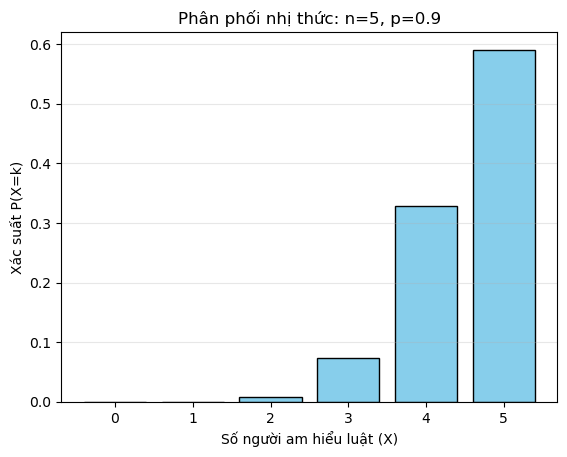

In [5]:
# # Bước 6: Vẽ biểu đồ phân phối
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title("Phân phối nhị thức: n=5, p=0.9")
plt.xlabel("Số người am hiểu luật (X)")
plt.ylabel("Xác suất P(X=k)")
plt.grid(axis='y', alpha=0.3)
plt.show()


### 📌 Chú thích cho **Code Cell 6**
- Phân phối dùng: **binom**.

In [3]:
mean, var = binom.stats(n, p)
print("Trung bình:", mean)
print("Phương sai:", var)


Trung bình: 4.5
Phương sai: 0.4499999999999993


b) Tính E (3- 5X) và V (3X-2).

Để tính giá trị kỳ vọng (expectation) và phương sai (variance) của các biến ngẫu nhiên, bạn cần biết phân phối xác suất của biến đó. Trong trường hợp này, X là biến ngẫu nhiên biểu diễn số người am hiểu luật trong 5 người giao diện, và chúng ta đã sử dụng phân phối nhị thức.

1. Giá trị kỳ vọng của 3 - 5X:
   E(3 - 5X) = 3 - 5 * E(X)

   Ta đã tính E(X) trong ví dụ trước:
   E(X) = n * p = 5 * 0.9 = 4.5

   Vậy:
   E(3 - 5X) = 3 - 5 * 4.5 = 3 - 22.5 = -19.5

2. Phương sai của 3X - 2:
   V(3X - 2) = 3^2 * V(X)

   Để tính phương sai V(X), chúng ta sử dụng công thức:
   V(X) = n * p * (1 - p)

   Trong trường hợp này:
   V(X) = 5 * 0.9 * (1 - 0.9) = 5 * 0.9 * 0.1 = 0.45

   Vậy:
   V(3X - 2) = 3^2 * 0.45 = 9 * 0.45 = 4.05

Vậy, giá trị kỳ vọng E(3 - 5X) là -19.5 và phương sai V(3X - 2) là 4.05.

### 📌 Chú thích cho **Code Cell 8**
- Phân phối dùng: **binom**.

In [10]:
from scipy.stats import binom

# Tham số phân phối
n, p = 5, 0.9

# Kỳ vọng và phương sai của X
EX, VX = binom.stats(n, p)
print("E(X) =", EX)
print("V(X) =", VX)

# Tính E(3 - 5X)
E_expr = 3 - 5 * EX

# Tính V(3X - 2)
V_expr = (3**2) * VX

print("E(3 - 5X) =", E_expr)
print("V(3X - 2) =", V_expr)


E(X) = 4.5
V(X) = 0.4499999999999993
E(3 - 5X) = -19.5
V(3X - 2) = 4.049999999999994



## **Bài tập 2:** Một lô hàng có 8 sản phẩm loai I và 2 sản phẩm loại II. Lấy ngẫu nhiên lần lượt ra 5 sản phẩm theo phương thức hoàn lại. Gọi X là số sản phẩm loại II trong 5 sản phẩm lấy ra.

a) X có phân phối gì?

b) Tính kỳ vọng và phương sai của X.

c) Tính tính khả năng để xảy ra số sản phẩm loại II trung bình trong số sản phẩm lấy ra.

### 📌 Chú thích cho **Code Cell 10**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [8]:
from scipy.stats import binom

# Thông tin bài toán
n = 5       # số phép thử
p = 0.2     # xác suất chọn sản phẩm loại II

# a) Phân phối
print("a) X ~ Binomial(n=5, p=0.2)")
#Vẽ: 
# # Tạo trục giá trị X (chỉ lấy khoảng quanh trung bình để dễ nhìn)
# x = np.arange(740, 860)
# y = binom.pmf(x, n, p)   # pmf = Probability Mass Function = P(X=k)

# plt.plot(x, y, marker='o', color='skyblue')
# plt.title("Phân phối nhị thức: n=1000, p=0.8")
# plt.xlabel("Số cây sống (X)")
# plt.ylabel("Xác suất P(X=k)")
# plt.grid(alpha=0.3)
# plt.show()

# b) Kỳ vọng và phương sai
EX, VX = binom.stats(n, p)
print(f"b) E(X) = {EX}")
print(f"   Var(X) = {VX}")

# c) Xác suất X = 1
prob = binom.pmf(1, n, p)
print(f"c) P(X=1) = {prob:.4f}")



a) X ~ Binomial(n=5, p=0.2)
b) E(X) = 1.0
   Var(X) = 0.7999999999999999
c) P(X=1) = 0.4096


### 📌 Chú thích cho **Code Cell 11**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

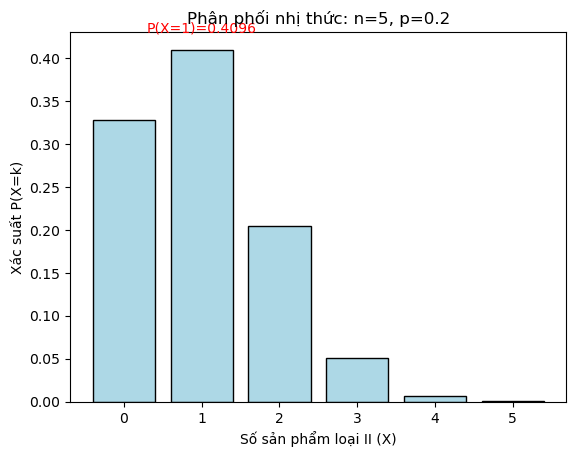

In [5]:
# vẽ thử sơ đồ minh họa 
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.bar(x, y, color='lightblue', edgecolor='black')
plt.title("Phân phối nhị thức: n=5, p=0.2")
plt.xlabel("Số sản phẩm loại II (X)")
plt.ylabel("Xác suất P(X=k)")

# Ghi chú lên cột X=1
plt.text(1, y[1]+0.02, f"P(X=1)={y[1]:.4f}", ha='center', color='red', fontsize=10)

plt.show()


### Bài tập 3: Xác suất để một cây sống sau một thời gian trồng là 0,8. Trồng 1000 cây. Gọi X là số cây sống sau một thời gian trồng.

a) Tìm luật phân phối xác suất của X.

b) Tính xác suất có 750 cây sống sau một thời gian trồng.

c) Tính E(X), var(X) và cho biết số cây sống sau một thời gian trồng có khả năng cao nhất là bao nhiêu ?

### 📌 Chú thích cho **Code Cell 13**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [95]:
# 
n = 1000
p = 0.8 
print("a) X ~ Binomial ( n = 1000, p = 0.8)")

#Vẽ: 
# Tạo trục giá trị X (chỉ lấy khoảng quanh trung bình để dễ nhìn)
# x = np.arange(740, 860)
# y = binom.pmf(x, n, p)   # pmf = Probability Mass Function = P(X=k)

# plt.plot(x, y, marker='o', color='skyblue')
# plt.title("Phân phối nhị thức: n=1000, p=0.8")
# plt.xlabel("Số cây sống (X)")
# plt.ylabel("Xác suất P(X=k)")
# plt.grid(alpha=0.3)
# plt.show()


a) X ~ Binomial ( n = 1000, p = 0.8)


### 📌 Chú thích cho **Code Cell 14**
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [36]:
# b 
# from scipy.stats import binom -> thư viện dùng để 

n = 1000
p = 0.8
k = 750 #cây
prob_750 = binom.pmf(k, n, p)
print(f"b) Xác suất có đúng {k} cây sống là: P(X={k}) = {prob_750:.6f}")

b) Xác suất có đúng 750 cây sống là: P(X=750) = 0.000018


### 📌 Chú thích cho **Code Cell 15**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [96]:
# Biểu đồ phân phối rời rạc để thấy vị trí X=750
# x = np.arange(740, 860)
# y = binom.pmf(x, n, p)

# plt.bar(x, y, color='lightblue', edgecolor='black')
# plt.axvline(k, color='red', linestyle='--', label=f'X={k}')
# plt.text(k+1, prob_750, f"P(X={k})={prob_750:.10f}", color='blue')
# plt.title("Phân phối nhị thức (n=1000, p=0.8)")
# plt.xlabel("Số cây sống (X)")
# plt.ylabel("Xác suất P(X=k)")
# plt.legend()
# plt.show()



## Bài tập 4: Một lô hàng chứa rất nhiều sản phẩm, trong đó tỉ lệ sản phẩm đạt chuẩn là 70%. Chọn ngẫu nhiên từ lô hàng ra 5 sản phẩm. Gọi X là số  sản phẩm  đạt chuẩn  có trong 5  sản  phẩm chọn  ra. Hãy  lập  bảng phân phối xác suất cho X, và tính EX, varX.

### 📌 Chú thích cho **Code Cell 17**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [97]:
# a, lập bảng phân phối xác suất   
n = 5       # số lần thử (sản phẩm chọn ra)
p = 0.7     # xác suất sản phẩm đạt chuẩn

# Tạo dãy giá trị có thể của X (từ 0 đến 5)
x = np.arange(0, n+1)   # tạo mảng [0,1,2,3,4,5]

# tính xác suất
pmf = binom.pmf(x, n, p)

print("Bảng phân phối xác suất của X (số sản phẩm đạt chuẩn):")
for k, prob in zip(x, pmf):
    print(f"P(X = {k}) = {prob:.5f}")

# Vẽ biểu đồ phân phối
# plt.bar(x, pmf, color='lightgreen', edgecolor='black')
# plt.title("Phân phối nhị thức: n=5, p=0.7")
# plt.xlabel("Số sản phẩm đạt chuẩn (X)")
# plt.ylabel("Xác suất P(X=k)")
# plt.grid(axis='y', alpha=0.3)
# plt.show()


Bảng phân phối xác suất của X (số sản phẩm đạt chuẩn):
P(X = 0) = 0.00243
P(X = 1) = 0.02835
P(X = 2) = 0.13230
P(X = 3) = 0.30870
P(X = 4) = 0.36015
P(X = 5) = 0.16807


### 📌 Chú thích cho **Code Cell 18**
- Phân phối dùng: **binom**.

In [42]:
# Tính các giá trị đặc trưng
EX, VX = binom.stats(n, p)  
sigma = np.sqrt(VX)          # Độ lệch chuẩn σ = √Var(X)

print("\nCác giá trị đặc trưng:")
print(f"E(X) = {EX:.2f}")
print(f"Var(X) = {VX:.2f}")
print(f"σ (độ lệch chuẩn) = {sigma:.3f}")



Các giá trị đặc trưng:
E(X) = 3.50
Var(X) = 1.05
σ (độ lệch chuẩn) = 1.025


## Bài tập 5: Xác suất để 1 bệnh nhân được chữa khỏi khi điều trị một bệnh hiếm gặp về máu là 0,4. Nếu 15 người đồng ý chữa trị thì xác suất:

a) Có ít nhất 10 người khỏi

b) Có từ 3 đến 8 người khỏi

c) Có đúng 5 người khỏi

Là bao nhiêu?

### 📌 Chú thích cho **Code Cell 20**
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `cdf(x,...)` = P(X≤x)

In [48]:
# a) Xác suất có ÍT NHẤT 10 người khỏi: P(X >= 10)
p , n = 0.4 , 15 
P_a = 1 - binom.cdf(9, n, p)
print(f"a) P(X >= 10) = {P_a:.6f}")

# b)  Xác suất có từ 3 đến 8 người khỏi
P_b = 1 - binom.cdf(8, n , p) 
print (f"b) P( 3<= X <= 8) = {P_b:.6f}")

# c) Xác suất có đúng 5 người khỏi
P_c = 1 - binom.cdf(5, n, p)
print(f"c) P(X = 5) = {P_c:.6f}")


a) P(X >= 10) = 0.033833
b) P( 3<= X <= 8) = 0.095047
c) P(X = 5) = 0.596784


### 📌 Chú thích cho **Code Cell 21**
- Phân phối dùng: **binom**.

In [49]:
EX, VX = binom.stats(n, p)
sigma = VX ** 0.5
print(f"\nE(X) = {EX:.2f}")
print(f"Var(X) = {VX:.2f}")
print(f"σ (độ lệch chuẩn) = {sigma:.3f}")



E(X) = 6.00
Var(X) = 3.60
σ (độ lệch chuẩn) = 1.897


## nhận xét
- Trung bình có 6 người khỏi trong 15 người.
- Độ lệch chuẩn ≈ 1.9 → kết quả thường dao động quanh 4–8 người.
- Xác suất có ≥10 người khỏi là rất thấp, vì 10 cao hơn trung bình khá nhiều.
- P(X=5) là giá trị đơn lẻ cao nhất → là mode xấp xỉ.

## Bài tập 6: Một chuỗi cửa hàng bán lẻ lớn mua một loại thiết
bị điện tử về để bán. Nhà sản xuất cho biết tỷ lệ bị
hư hỏng của loại thiết bị này là 3%.

a) Bộ phận kiểm tra lấy ngẫu nhiên 20 thiết bị từ lô
hàng được giao. Xác suất có ít nhất 1 thiết bị
hỏng là bao nhiêu?

b) Giả sử cửa hàng nhập 10 lô hàng 1 tháng và với
mỗi lô hàng đều được kiểm tra ngẫu nhiên 20
thiết bị. Xác suất có đúng 3 lô hàng có chứa ít
nhất 1 thiết bị hỏng trong số 20 thiết bị được
kiểm tra?

### 📌 Chú thích cho **Code Cell 24**
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [60]:
# a) Xác suất có ít nhất 1 thiết bị hỏng là bao nhiêu?
n = 20
p = 0.03

P_a = binom.pmf(0, n, p)       # Xác suất không hỏng
P_at_least_1 = 1 - P_0         # Xác suất ít nhất 1 hỏng
print(f"a)")
print(f"P(X=0) = {P_a:.6f}")
print(f"P(X>=1)= {P_at_least_1:.6f}")

print("------")
print(f"b)")
N = 10
q = P_a
P_b = binom.pmf(3, N, q)
print(f"P(3 lô hàng có lỗi) = {P_b:.5f}")



a)
P(X=0) = 0.543794
P(X>=1)= 0.456206
------
b)
P(3 lô hàng có lỗi) = 0.07936


## Bài tập 7: Có giả thiết cho rằng 30% các giếng nước trong 500 giếng ở vùng
nông thôn có tạp chất. Để có thể tìm hiểu kỹ hơn
người ta đi xét nghiệm một số giếng (vì không đủ
tiền xét nghiệm hết).

a) Giả sử giả thiết trên đúng, tính xác suất có đúng
3 giếng có tạp chất.

b) Xác suất có nhiều hơn 3 giếng có tạp chất?

c) Giả sử trong 10 giếng đã kiểm tra thì có 6 giếng
có tạp chất. Có thể kết luận gì về giả thiết trên?

### 📌 Chú thích cho **Code Cell 26**
- **`np.arange(start, stop, step)`**: dãy rời rạc để quét **giá trị k** (PMF).
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)
  - `cdf(x,...)` = P(X≤x)

In [92]:
# 1. Import các thư viện cần thiết
from scipy.stats import binom       # Thư viện tính toán phân phối nhị thức
import matplotlib.pyplot as plt     # Dùng để vẽ biểu đồ
import numpy as np                  # Dùng để tạo mảng dữ liệu

# 2. Khai báo tham số của bài toán
n = 10      # số giếng được kiểm tra trong 500 giếng
p = 0.3     # xác suất 1 giếng có tạp chất
X_obs = 6   # số giếng thực tế có tạp chất quan sát được

# a) P(X = 3)

# Dùng hàm binom.pmf(k, n, p) => Tính xác suất X nhận đúng giá trị k
P_a = binom.pmf(3, n, p)
print(f"a) P(X = 3) = {P_a:.5f}")

# b) P(X > 3)
# Dùng hàm binom.cdf(k, n, p)  => P(X ≤ k). Vậy P(X > 3) = 1 - P(X ≤ 3)
P_b = 1 - binom.cdf(3, n, p)
print(f"b) P(X > 3) = {P_b:.5f}")

# c) Quan sát thực tế X_obs = 6
# Dưới giả thiết p=0.3, tính xác suất để thấy X ≥ 6. Nếu xác suất này < 0.05, có thể bác bỏ giả thiết
P_c = 1 - binom.cdf(X_obs - 1, n, p)
print(f"c) P(X ≥ 6 | p=0.3) = {P_c:.5f}")

# # d) Vẽ biểu đồ phân phối xác suất
# x = np.arange(0, n + 1)        # Các giá trị có thể của X: 0, 1, ..., 10
# y = binom.pmf(x, n, p)         # Tính P(X=k) cho từng giá trị

# plt.figure(figsize=(8, 5))
# plt.bar(x, y, color='lightblue', edgecolor='black', label="P(X=k)")

# # Tô màu vùng X ≥ 6 (vùng hiếm gặp)
# plt.bar(x[x >= 6], y[x >= 6], color='red', label="Vùng X ≥ 6 (ít xảy ra)")

# # Trang trí biểu đồ
# plt.title("Phân phối X ~ Binomial(10, 0.3) - Giếng có tạp chất")
# plt.xlabel("Số giếng có tạp chất (X)")
# plt.ylabel("Xác suất P(X=k)")
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# e) Tính thêm kỳ vọng và phương sai của X
E_X = n * p
Var_X = n * p * (1 - p)
sigma = Var_X ** 0.5

print("\nCác đại lượng đặc trưng của X:")
print(f"E(X) = {E_X:.2f}")
print(f"Var(X) = {Var_X:.3f}")
print(f"σ (độ lệch chuẩn) = {sigma:.3f}")



a) P(X = 3) = 0.26683
b) P(X > 3) = 0.35039
c) P(X ≥ 6 | p=0.3) = 0.04735

Các đại lượng đặc trưng của X:
E(X) = 3.00
Var(X) = 2.100
σ (độ lệch chuẩn) = 1.449


# Phân phối Poisson

**Bài tập 1:** Một mạng lưới máy tính khi bị nghẽn thì một gói dữ liệu có xác suất bị mất là 1% và các gói dữ liệu bị mất là độc lập với nhau. Các gói dữ liệu bị mất này cần phải gửi lại. Một thư điện tử có 100 gói dữ liệu.

1.   Sử dụng phân phối Nhị thức và phân phối Poisson, tính trung bình và độ lệch chuẩn của các gói dữ liệu cần phải gửi lại ứng với từng phân phối.
2.   Tính xác suất để có hai hay nhiều hơn gói dữ liệu cần gửi lại.


### Sử dụng Phân phối Nhị thức



1.  **Sử dụng phân phối Nhị thức và phân phối Poisson, tính trung bình và độ lệch chuẩn của các gói dữ liệu cần phải gửi lại ứng với từng phân phối.**

2.  **Tính xác suất để có hai hay nhiều hơn gói dữ liệu cần gửi lại.**

Để tính xác suất để có hai hoặc nhiều hơn gói dữ liệu cần gửi lại, bạn cần tính tổng xác suất của các trường hợp có k gói dữ liệu cần gửi lại, với k từ 2 đến 100. Công thức này sẽ giúp bạn tính xác suất $P(X \geq 2)$:

$$P(X \geq 2) = 1 - P(X = 0) - P(X = 1)$$

### Sử dụng Phân phối Poisson



Để sử dụng phân phối Poisson trong bài toán này, trước hết chúng ta cần xác định các tham số của phân phối Poisson. Trong trường hợp này, ta sẽ xem xác suất mất một gói dữ liệu là một sự kiện hiếm hoi (xác suất rất nhỏ), nên ta có thể xấp xỉ nó bằng một phân phối Poisson với trung bình (lambda) là 1% của tổng số gói dữ liệu (100 gói).

Trong phân phối Poisson, trung bình và phương sai là giống nhau và bằng lambda. Vì vậy, lambda trong trường hợp này sẽ là 1% của 100, tức là lambda = 1.

Bây giờ, để tính xác suất cho từng giá trị k từ 0 đến 100 (số gói dữ liệu cần gửi lại), chúng ta sử dụng phân phối Poisson với lambda = 1. Sử dụng thư viện `scipy.stats`, bạn có thể tính xác suất như sau:

Kết quả này sẽ cho biết phân phối xác suất của số gói dữ liệu cần gửi lại (từ 0 đến 100) khi xem xác suất mất một gói dữ liệu là một sự kiện theo phân phối Poisson với lambda = 1.

Sử dụng `poisson_dist.mean()` và `poisson_dist.std()`.

1.  Sử dụng phân phối Nhị thức và phân phối Poisson, tính trung bình và độ lệch chuẩn của các gói dữ liệu cần phải gửi lại ứng với từng phân phối.

### 📌 Chú thích cho **Code Cell 35**
- Phân phối dùng: **binom**, **poisson**.

In [62]:
# from scipy.stats import binom, poisson
# import numpy as np
n = 100
p = 0.01
lam = n * p  # lambda cho Poisson

# --- 1. Trung bình và độ lệch chuẩn ---
E_binom = n * p
Var_binom = n * p * (1 - p)
sigma_binom = np.sqrt(Var_binom)

E_pois = lam
Var_pois = lam
sigma_pois = np.sqrt(Var_pois)

print("1) TRUNG BÌNH & ĐỘ LỆCH CHUẨN")
print(f"Nhị thức: E(X)={E_binom:.2f}, Var={Var_binom:.2f}, σ={sigma_binom:.3f}")
print(f"Poisson:  E(X)={E_pois:.2f}, Var={Var_pois:.2f}, σ={sigma_pois:.3f}")


1) TRUNG BÌNH & ĐỘ LỆCH CHUẨN
Nhị thức: E(X)=1.00, Var=0.99, σ=0.995
Poisson:  E(X)=1.00, Var=1.00, σ=1.000


2.  Tính xác suất để có hai hay nhiều hơn gói dữ liệu cần gửi lại.

Trước tiên, tính xác suất mất một gói dữ liệu trong một thư điện tử bằng phân phối Poisson với lambda = 1 (như đã giải quyết trong câu a). Sau đó, sử dụng phương pháp đối ngẫu để tính xác suất ít nhất hai gói dữ liệu cần gửi lại:

$$P(X \geq 2) = 1 - P(X = 0) - P(X = 1)$$

### 📌 Chú thích cho **Code Cell 37**
- Phân phối dùng: **binom**, **poisson**.
- Hàm xác suất:
  - `cdf(x,...)` = P(X≤x)

In [63]:
# --- 2. Xác suất X ≥ 2 ---
P_binom = 1 - binom.cdf(1, n, p)
P_pois = 1 - poisson.cdf(1, lam)

print("\n2) XÁC SUẤT CÓ ≥ 2 GÓI PHẢI GỬI LẠI")
print(f"Nhị thức: P(X≥2) = {P_binom:.5f}")
print(f"Poisson:  P(X≥2) = {P_pois:.5f}")



2) XÁC SUẤT CÓ ≥ 2 GÓI PHẢI GỬI LẠI
Nhị thức: P(X≥2) = 0.26424
Poisson:  P(X≥2) = 0.26424


## Bài tập 2: Xác suất để đoàn tàu khởi hành đúng giờ là 98,2%. Tính xác suất để 1000 chuyến tàu có 995 chuyến tàu khởi hành đúng thời gian.

### 📌 Chú thích cho **Code Cell 39**
- Phân phối dùng: **binom**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [66]:
n = 1000
p = 0.982
k = 995

print(f"cách 1")
P_binom = binom.pmf(k, n, p)
print(f"P(X = 995) theo nhị thức = {P_binom:.10f}")


cách 1
P(X = 995) theo nhị thức = 0.0002206796


### 📌 Chú thích cho **Code Cell 40**
- Phân phối dùng: **poisson**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)

In [69]:
print(f"cách 2")

from math import exp, factorial
from scipy.stats import poisson

lam = n * (1 - p)   # λ = n * q = 1000 * 0.018 = 18
k = 5               # 5 chuyến trễ => 995 chuyến đúng giờ

# --- Cách 1: Tính theo công thức Poisson ---
# P_manual = exp(-lam) * lam**k / factorial(k)

# --- Cách 2: Dùng hàm poisson.pmf ---
P_lib = poisson.pmf(k, lam)

print("Xác suất có đúng 995 chuyến tàu đúng giờ (Poisson):")
# print(f"λ = {lam}")
print(f"P(Y = 5) = {P_lib:.6f}")
# print(f"Kiểm tra bằng công thức = {P_manual:.6f}")


cách 2
Xác suất có đúng 995 chuyến tàu đúng giờ (Poisson):
P(Y = 5) = 0.000240


## Bài tập 3: Lưu lượng giao thông theo cách truyền thống được coi là có phân phối Poisson. Một trạm kiểm soát điều khiển lưu lượng giao thông ở một nút giao thông với trung bình 6 xe một phút. Để thiết lập thời gian cho đèn tín hiệu thì các xác suất sau đây được sử dụng:

### 📌 Chú thích cho **Code Cell 42**
- Phân phối dùng: **poisson**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)
  - `cdf(x,...)` = P(X≤x)

In [88]:
lam = 6  # trung bình 6 xe/phút

# --- Tính các xác suất ---
# a) Không có xe (X = 0) => giá trị cụ thể dùng pmf
P0 = poisson.pmf(0, lam)
print(f"a) P(X=0) = {P0:.6f}")

# b) Đúng 3 xe (X = 3)
P3 = poisson.pmf(3, lam)
print(f"b) P(X=3) = {P3:.6f}")

# c) Nhiều hơn 3 xe (X > 3) => giá trị khong cụ thể dùng hàm tích lũy (cdf) -> P(X>3) = 1 - P(X<=3)
P_more3 = 1 - poisson.cdf(3, lam)
print(f"c) P(X>3) = {P_more3:.6f}")

# d) Ít hơn hoặc bằng 2 xe
P_le2 = poisson.cdf(2, lam)
print(f"d) P(X<=2) = {P_le2:.6f}")


a) P(X=0) = 0.002479
b) P(X=3) = 0.089235
c) P(X>3) = 0.848796
d) P(X<=2) = 0.061969


## Bài tập 4: Số cuộc gọi điện thoại đến trung tâm tổng đài thường được mô tả là một biến ngẫu nhiên Poisson. Biết rẳng trung bình có 10 cuộc điện thoại gọi tới trong 1 giờ.

a) Xác suất có đúng 5 cuộc điện thoại gọi tới trong 1 giờ là bao nhiêu?

b) Xác suất có 3 hoặc ít hơn 3 cuộc điện thoại gọi tới trong 1 giờ là bao nhiêu?

c) Xác suất có đúng 15 cuộc điện thoại gọi tới trong 2 giờ là bao nhiêu?

d) Xác suất có đúng 5 cuộc điện thoại gọi tới trong 30 phút là bao nhiêu?



### 📌 Chú thích cho **Code Cell 44**
- Phân phối dùng: **poisson**.
- Hàm xác suất:
  - `pmf(k,...)` = P(X=k) (rời rạc)
  - `cdf(x,...)` = P(X≤x)

In [80]:
lam = 10 # trung bình 10 cuộc gọi/ giờ
# --- Tính các xác suất ---
# a) có đúng 5 cuộc gọi (X = 5) => giá trị cụ thể dùng pmf
P5 = poisson.pmf(5, lam)
print(f"a) P(X=5) = {P5:.6f}")

# b )Xác suất có 3 hoặc ít hơn 3 cuộc điện thoại gọi tới trong 1 giờ là bao nhiêu?
P3 = poisson.pmf(3, lam)
print(f"b) " )
print(f" P(X=3) = {P3:.6f}")
P_le3 = 1 - poisson.cdf(3, lam)
print(f" P(X<3) = {P_le3:.6f}")

# c) Xác suất có đúng 15 cuộc điện thoại gọi tới trong 2 giờ là bao nhiêu?
lam_2h = 20
P_c = poisson.pmf(15, lam_2h)
print(f"c) P(X=15 trong 2 giờ) = {P_c:.6f}")


# Xác suất có đúng 5 cuộc điện thoại gọi tới trong 30 phút là bao nhiêu?
# 30 phút = 0.5 giờ → 10×0.5=5
lam_30min = 5
P_d = poisson.pmf(5, lam_30min)
print(f"d) P(X=5 trong 30 phút) = {P_d:.6f}")

a) P(X=5) = 0.037833
b) 
 P(X=3) = 0.007567
 P(X<3) = 0.989664
c) P(X=15 trong 2 giờ) = 0.051649
d) P(X=5 trong 30 phút) = 0.175467


## Bài tập 5: Một máy dệt có 5000 ống sợi, xác suất để trong 1 phút mỗi ống sợi bị ngưng hoạt động (do sợi bị đứt, bị rối,..) là 0,0004. Gọi X là số ống sợi bị ngưng hoạt động trong 1 phút.

a) Tìm luật phân phối xác suất của X.

b) Tính xác suất để trong 1 phút có hơn 2 ống sợi bị ngưng hoạt động.

### 📌 Chú thích cho **Code Cell 46**
- Phân phối dùng: **poisson**.
- Hàm xác suất:
  - `cdf(x,...)` = P(X≤x)

In [89]:
# a, Tìm luật phân phối xác suất của X
# λ=n×p=5000×0.0004=2
n = 5000
p = 0.0004
print("a) X ~ Binomial ( n = 5000, p = 0.0004)")

#b) xác suất để trong 1 phút có hơn 2 ống sợi bị ngưng hoạt động.
lam = 2
#
P_b = 1- poisson.cdf(2 , lam)
print(f"b) P(X=5) = {P_b:.6f}")

a) X ~ Binomial ( n = 5000, p = 0.0004)
b) P(X=5) = 0.323324


## Bài tập 6: Ở trạm xăng H, bình quân mỗi 10 phút có 15 xe máy đến đổ xăng. Biết rằng số xe máy đến đổ xăng ở trạm xăng này trong khoảng thời gian t phút là biến ngẫu nhiên có phân phối Poisson.

a) Tìm xác suất để trong khoảng thời gian 10 phút có ít nhất 4 xe máy đến đổ xăng tại trạm xăng này.

b) Tìm xác suất để trong khoảng thời gian 15 phút có từ 20 đến 24 xe máy đến đổ xăng tại trạm xăng H.

### 📌 Chú thích cho **Code Cell 48**
- Phân phối dùng: **poisson**.
- Hàm xác suất:
  - `cdf(x,...)` = P(X≤x)

In [90]:
# Trung bình 10 phút có 15 xe → λ10 = 15 
lam_10 = 15
# a) Trong 10 phút, có ít nhất 4 xe => λ10 = 15
P_a = 1 - poisson.cdf(3, lam_10)
print(f"Bài 6a: P(X>= 4 trong 10 phút) = {P_a:.6f}")

# b) Trong 15 phút có từ 20 đến 24 xe => Thời gian tăng 1.5 lần → λ15 = 15×10/15 =22.5
lam_15 = 22.5
P_b = poisson.cdf(24, lam_15) - poisson.cdf(19, lam_15)
print(f"Bài 6b: P(20 <= X <= 24 trong 15 phút) = {P_b:.6f}")

Bài 6a: P(X>= 4 trong 10 phút) = 0.999789
Bài 6b: P(20 <= X <= 24 trong 15 phút) = 0.403249


## Bài tập 7: Một nhà sản xuất ghim nhận ra rằng thường thì 5% số hàng sẽ bị lỗi. Ông đưa ra 100 mẫu và bảo đảm rằng sẽ có không quá 4 ghim bị lỗi. Xác suất nhóm hàng trên đạt được như ông chủ muốn là bao nhiêu?

### 📌 Chú thích cho **Code Cell 50**
- Phân phối dùng: **poisson**.
- Hàm xác suất:
  - `cdf(x,...)` = P(X≤x)

In [91]:
# xác suất ghim bị lỗi là 0.05 , n = 100 , <= 4 ghim bị lỗi
lam = 5
P_7 = poisson.cdf(4, lam)
print(f"Bài 7: P(X <= 4) = {P_7:.6f}")


Bài 7: P(X <= 4) = 0.440493


### 📌 Chú thích cho **Code Cell 51**
- Cell này không chứa thao tác sinh/ước lượng xác suất nổi bật; xem code bên dưới.

### 📌 Chú thích cho **Code Cell 52**
- Cell này không chứa thao tác sinh/ước lượng xác suất nổi bật; xem code bên dưới.